In [314]:
# importing a packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

In [315]:
# Loading a data from the CSV file
netflixStockDF = pd.read_csv('NFLX.csv')
netflixStockDF.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [316]:
# Calculate 5- day moving average if the value are NaN the fill it using next valid value
netflixStockDF['MA_5'] = netflixStockDF['Close'].rolling(window = 5).mean().fillna(method='bfill')

# Calculate 20 - day moving average if the value are NaN the fill it using next valid value
netflixStockDF['MA_20'] = netflixStockDF['Close'].rolling(window = 20).mean().fillna(method='bfill')

# removing missing values from the dataframe
netflixStockDF.fillna(method='bfill') 

netflixStockDF

,Date,Open,High,Low,Close,Adj Close,Volume,MA_5,MA_20
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,256.822000,276.568499
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,256.822000,276.568499
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,256.822000,276.568499
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,256.822000,276.568499
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,256.822000,276.568499
...,...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,384.864007,487.853500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,403.006006,480.841501
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,416.962006,472.758000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,420.742004,464.661999


In [317]:
netflixStockDF.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
MA_5         float64
MA_20        float64
dtype: object

In [318]:
def preProcessing(dataframe):
    '''
    Preprocceses a stock price dataframe by extracting date features,
    reordering columns. Rounding numerical vlaues. this function will return a preprocessed 'Dataframe'.
    '''
    # Converting a date column to datetime columns  
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    
    # Extrating a Number of year, month, week and day
    dataframe['Year']  = dataframe['Date'].dt.year
    dataframe['Month'] = dataframe['Date'].dt.month
    dataframe['Week']  = dataframe['Date'].dt.day_of_week
    dataframe['Day']  = dataframe['Date'].dt.day
        
    # Reordering a columns values 
    dataframe = dataframe[['Year', 'Month', 'Week','Day','Open','High','Low', 'Close','Volume', 'MA_5', 'MA_20']]
    
    # Applying a decimal precision to decimal or floting datatype columns.
    for col in dataframe[['Open','High', 'Low', 'Close', 'MA_5', 'MA_20']]:
        dataframe[col] = dataframe[col].apply(lambda x: round(x,2))
    return dataframe

In [328]:
def visualizaiton(ytest, ypred):
    plt.figure(figsize=(14,6))
    plt.scatter(ytest.values, ypred, alpha=0.5)
    plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', linewidth=2)
    plt.xlabel('Actual Closing Prices')
    plt.ylabel('Predicated Closing Prices')
    plt.title('Scatter Plot: Actual vs. Predicted')
    plt.grid(True)
    plt.show()

In [319]:
netflixStockDF = preProcessing(netflixStockDF)
netflixStockDF

,Year,Month,Week,Day,Open,High,Low,Close,Volume,MA_5,MA_20
0,2018,2,0,5,262.00,267.90,250.03,254.26,11896100,256.82,276.57
1,2018,2,1,6,247.70,266.70,245.00,265.72,12595800,256.82,276.57
2,2018,2,2,7,266.58,272.45,264.33,264.56,8981500,256.82,276.57
3,2018,2,3,8,267.08,267.62,250.00,250.10,9306700,256.82,276.57
4,2018,2,4,9,253.85,255.80,236.11,249.47,16906900,256.82,276.57
...,...,...,...,...,...,...,...,...,...,...,...
1004,2022,1,0,31,401.97,427.70,398.20,427.14,20047500,384.86,487.85
1005,2022,2,1,1,432.96,458.48,425.54,457.13,22542300,403.01,480.84
1006,2022,2,2,2,448.25,451.98,426.48,429.48,14346000,416.96,472.76
1007,2022,2,3,3,421.44,429.26,404.28,405.60,9905200,420.74,464.66


In [320]:
# Summary of numerical Columns
netflixStockDF[['Open','High','Low', 'Close','Volume']].describe()

,Open,High,Low,Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320704,412.374044,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06
min,233.920000,250.650000,231.230000,233.880000,1.144000e+06
25%,331.490000,336.300000,326.000000,331.620000,4.091900e+06
50%,377.770000,383.010000,370.880000,378.670000,5.934500e+06
75%,509.130000,515.630000,502.530000,509.080000,9.322400e+06
max,692.350000,700.990000,686.090000,691.690000,5.890430e+07


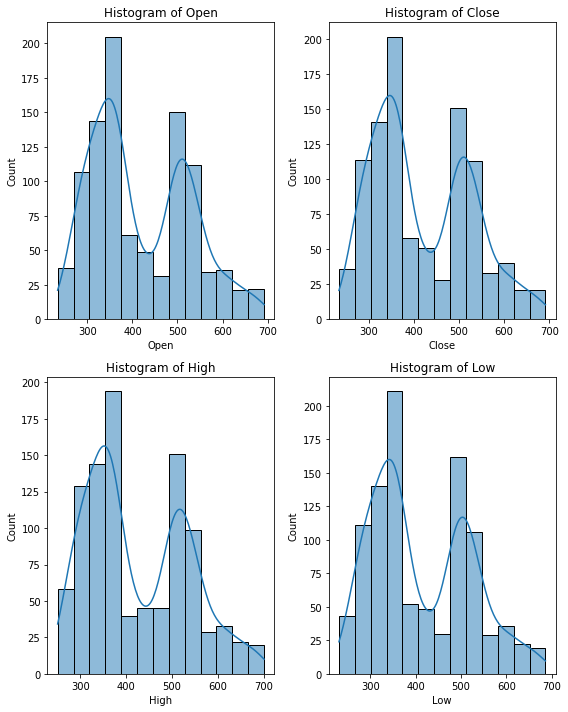

In [321]:
# Histogram plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,10))

# extrating a columns
netflixStockDF_col = ['Open','Close','High','Low']
for i, (colm, axes) in enumerate(zip(netflixStockDF_col, axes.flatten())):
  sns.histplot(data=netflixStockDF, x=colm, ax=axes, kde=True)
  axes.set_title(f'Histogram of {colm}')
plt.tight_layout()

In [322]:
# # Normalizing a data using MinMaxScaler
# netflixDF_col = netflixStockDF[['Open', 'High', 'Low', 'Close', 'Volume']]

# # Initialize the scaler
# scaler = MinMaxScaler()

# # Fit and Transform the data
# netflixDF_col = scaler.fit_transform(netflixDF_col)
# netflixDF_col

In [323]:
# Splitting a data into training and testing
features   = ['Year', 'Month', 'Week','Day','Open','High','Low','Volume', 'MA_5', 'MA_20'] 
target_col = 'Close'

x = netflixStockDF[features] 
y = netflixStockDF[target_col]

#Splitting the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('X_train shape :' ,x_train.shape)
print('X_test  shape :' ,x_test.shape)
print('Y_train shape :' ,y_train.shape)
print('Y_test  shape :' ,y_test.shape)


X_train shape : (807, 10)
X_test  shape : (202, 10)
Y_train shape : (807,)
Y_test  shape : (202,)


In [346]:
# Training Randomforestregressor model
rm_model = RandomForestRegressor(n_estimators=200, random_state=40)
rm_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=40)

Mean Absolute Error: 3.763188861386119 
Mean Squared Error : 27.753009646497446 
R-Squared          : 0.9976198224854573  


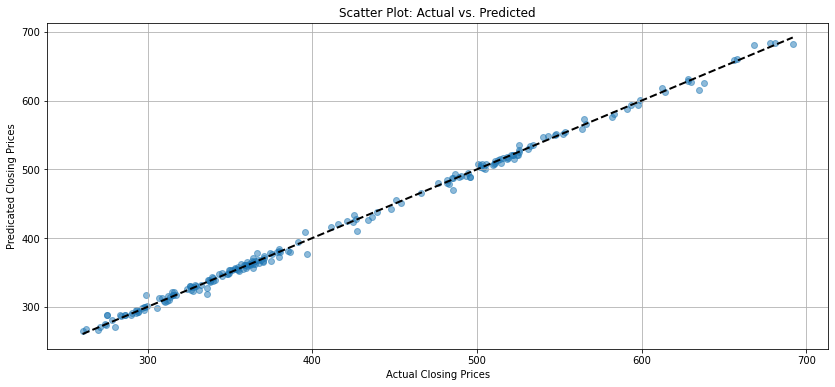

In [347]:
# Making prediction
y_pred = rm_model.predict(x_test)

# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae} ")
print(f"Mean Squared Error : {mse} ")
print(f"R-Squared          : {r2}  ")

visualizaiton(y_test, y_pred)
# interval = 10 # Every 10th Date
# x_labels = x_test.apply(lambda row: f"{int(row['Month'])}-{int(row['Day'])}", axis=1).values
# # Plotting the Results
# plt.figure(figsize=(14, 8))
# plt.plot(y_test.values, label = 'Actual', linestyle='-', marker='o', linewidth = 2)
# plt.plot(y_pred, label = 'Predicted', linestyle='--', marker='x', linewidth = 2)
# plt.xlabel('Time (month-Day)')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.title('Actual vs. Predicted Closing Prices')
# plt.grid(True)
# plt.xticks(range(len(y_test))[::interval], x_labels[::interval], rotation=45)
# plt.show()

In [330]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators'      : [500, 700, 900], #old_para: [200, 300, 500],
    'max_depth'         : [None, 20, 30],  #old_para: [10, 20, 30],
    'min_samples_split' : [10, 15, 20],    #old_para: [5,10, 15]
}

grid_search = GridSearchCV(estimator=rm_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=700)

Mean Absolute Error: 3.773299961296796 
Mean Squared Error : 27.840384360157735 
R-Squared          : 0.9976123289800162  


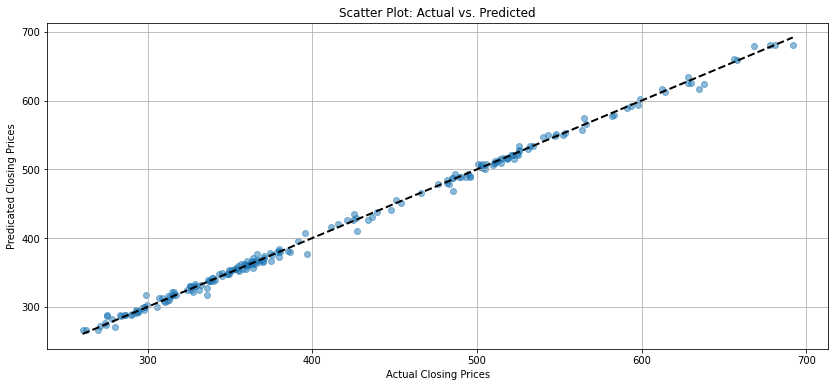

In [348]:
y_test_pred = best_model.predict(x_test)

# Evaluating the Model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)


print(f"Mean Absolute Error: {mae} ")
print(f"Mean Squared Error : {mse} ")
print(f"R-Squared          : {r2}  ")

visualizaiton(y_test, y_test_pred)
# interval = 10 # Every 10th Date
# x_labels = x_test.apply(lambda row: f"{int(row['Month'])}-{int(row['Day'])}", axis=1).values
# # Plotting the Results
# plt.figure(figsize=(14, 8))
# plt.plot(y_test.values, label = 'Actual', linestyle='-', marker='o', linewidth = 2)
# plt.plot(y_test_pred, label = 'Predicted', linestyle='--', marker='x', linewidth = 2)
# plt.xlabel('Time (month-Day)')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.title('Actual vs. Predicted Closing Prices')
# plt.grid(True)
# plt.xticks(range(len(y_test))[::interval], x_labels[::interval], rotation=45)
# plt.show()